In [1]:
%matplotlib inline
from vis_common import *
# TODO: Make a mini-dataframe for development. Cause memory is getting outta hand.

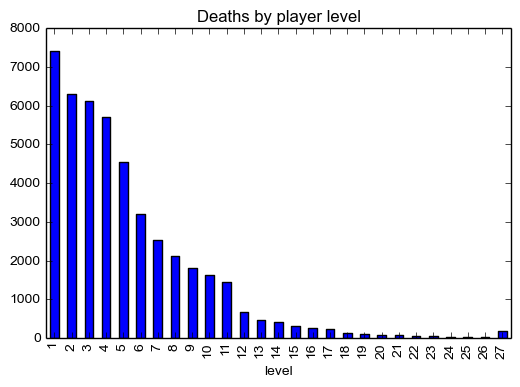

In [2]:
f[ilost].groupby('level').size().plot.bar(title='Deaths by player level');

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


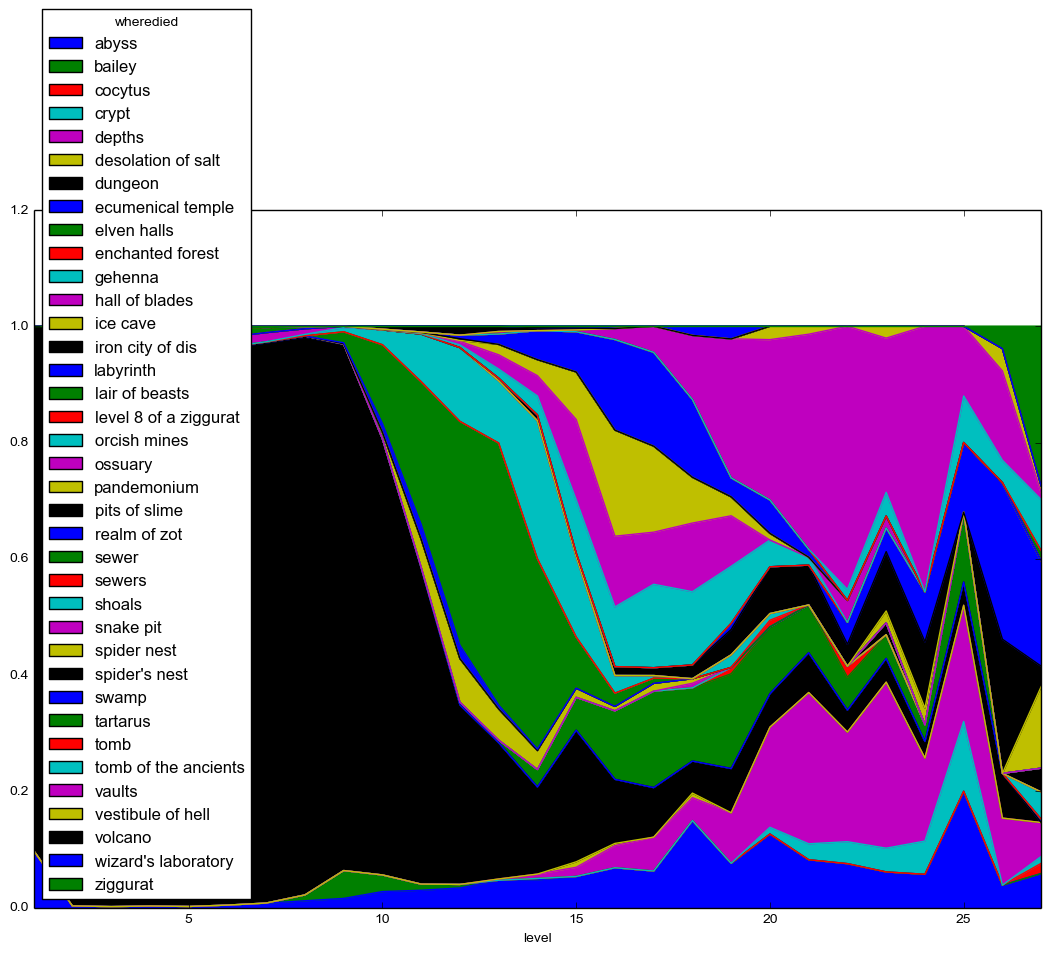

In [3]:
# TODO: bleh, lots of junk places in here. Should probably check against a fixed set when parsing.
x = f[ilost].groupby(['level', 'wheredied']).size().unstack()
x = x.div(x.sum(axis=1), axis=0)
# That legend is crazy, and probably need to normalize, but this isn't half-bad
x.plot.area(figsize=(13,9), stacked=True, legend=1);

In [4]:
# This is still too many places, but whatever. Might collapse portal vaults or remove silly
# ones like temple, trove, etc.
canon_deathplaces = {'abyss', 'crypt', 'depths',
    'dungeon', 'elven halls', 'lair of beasts',
    'orcish mines', 'pandemonium', 'pits of slime', 'realm of zot',
    'shoals', 'snake pit', 'spider nest', 'swamp', 'tomb', 'vaults',
    'ziggurat',
}
portal_vaults = {'bailey', 'volcano', 'desolation of salt', 'labyrinth', 'ossuary', 'sewer', 'ice cave', 'wizlab'}
silly = {'bazaar', 'ecumenical temple', 'treasure trove',}
canonized_deathplaces = {
    "cigotuvi's fleshworks": "wizlab",
    "doroklohe's tomb": "wizlab",
    "wucad mu's monastery": "wizlab",
    "wizard's laboratory": "wizlab",
    "zonguldrok's shrine": "wizlab",
    "gehenna": "hell",
    "iron city of dis": "hell",
    "sewers": "sewer",
    "spider's nest": "spider nest",
    "tartarus": "hell",
    "tomb of the ancients": "tomb",
    "vestibule of hell": "hell",
}
def get_canon_deathplace(wd):
    mapped = canonized_deathplaces.get(wd, wd)
    if mapped in canon_deathplaces:
        return mapped
    if mapped in silly:
        return None #'silly place'
    if mapped in portal_vaults:
        return 'portal vault'
    return canonized_deathplaces.get(wd, None)

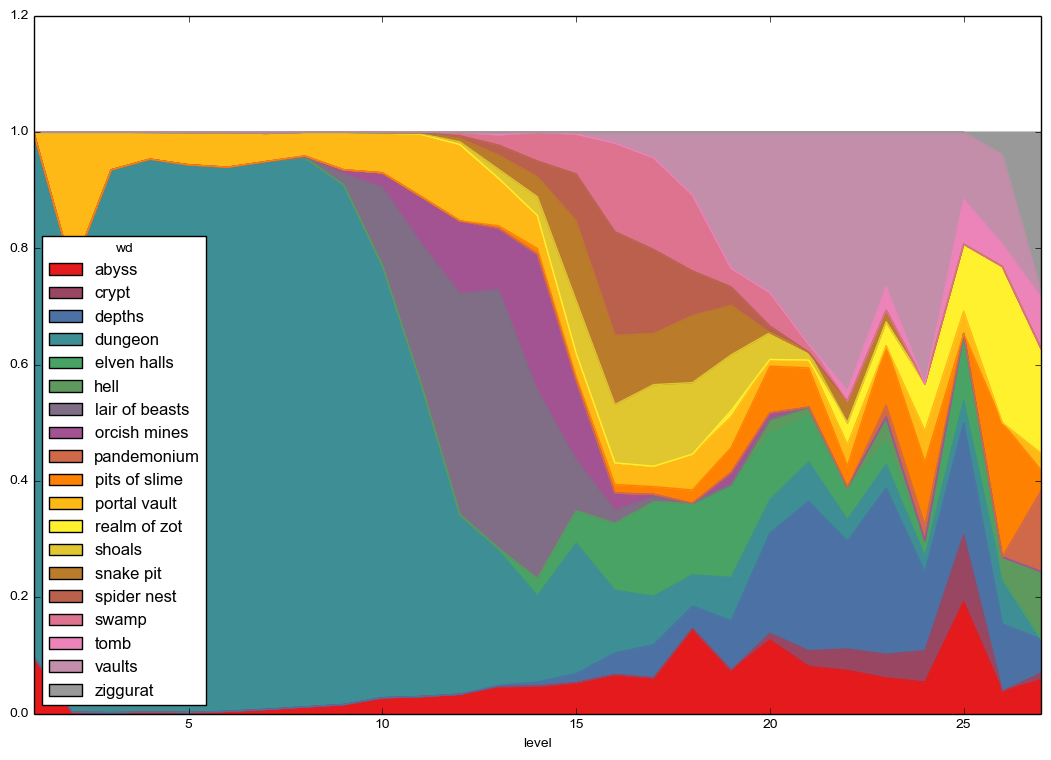

In [7]:
x = f[ilost].assign(wd=f['wheredied'].map(get_canon_deathplace))\
    .groupby(['level', 'wd']).size().unstack()
x = x.div(x.sum(axis=1), axis=0)
# That legend is crazy, and probably need to normalize, but this isn't half-bad
x.plot.area(figsize=(13,9), stacked=True, legend=1, colormap='Set1');
# TODO: Would be nice to colour these in some kind of logical way. e.g. lair branches all
# shades of the same colour, same with dungeon/depths/zot, orc/elven, pan/hell, and crypt/tomb

In [8]:
visit_cols = [col for col in f.columns if col.startswith('visited_')]
visited_to_wheredied = {
    'bailey': 'bailey',
    'desolation': 'desolation of salt',
    'ice cave': 'ice cave',
    'labyrinth': 'labyrinth',
    'ossuary': 'ossuary',
    'sewer': 'sewer',
    'volcano': 'volcano',
    'wizlab': "wizard's laboratory",
}

# Probably a clever way to do this w/o explicit looping, but whatever
vault_deadliness = {}
for (v, w) in visited_to_wheredied.iteritems():
    deaths = len(f[f['wheredied'] == w])
    visits = len(f[f['visited_'+v] == True])
    vault_deadliness[v] = 100 * deaths/(visits+0.0)
print vault_deadliness

{'ossuary': 10.873915943962642, 'labyrinth': 8.094768015794669, 'desolation': 35.714285714285715, 'wizlab': 3.723404255319149, 'ice cave': 15.295095594347465, 'sewer': 10.964705882352941, 'bailey': 20.808561236623067, 'volcano': 6.097560975609756}


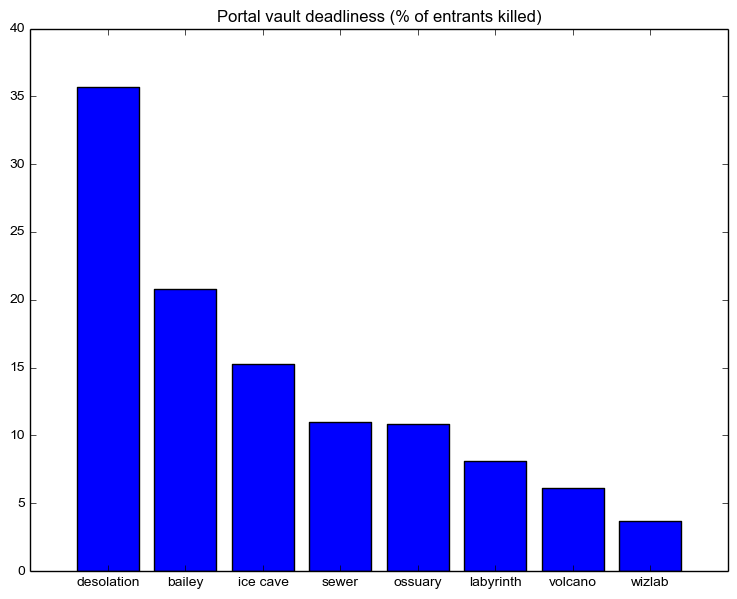

In [9]:
plot_dict(vault_deadliness, 'Portal vault deadliness (% of entrants killed)');
# Main trend here seems to be that vaults that appear later in the game have lower
# lethality. This is probably less a property of the vaults themselves and more a
# byproduct of how deaths are front-loaded to early player levels, and that players who
# are able to make it as far as a wizlab are very skilled.
# Would be cool to have some notion of 'level-adjusted deadliness'. Also for monsters.

In [11]:
f.groupby('howdied').size().sort_values(ascending=False)

howdied
monster        42782
quit            2479
suicide          326
cloud            165
starved           54
miscast           29
drowned           17
asphyxiated       14
rot                7
statdeath          4
dtype: int64

One possible takeaway from the above is that starvation isn't really much of an existential threat in crawl, and that maybe food should be made more rare. While I do think this is true, the above doesn't really represent a strong argument for that, because you might be more likely to die to a monster as a result of the symptoms of being on the brink of starvation death (nocast, combat penalties, fainting) before you die of starvation directly.

Could test that case by recording satiety level on death and counting how often people die while at 'starving' level hunger.

In [12]:
f[f['saw_temple']==True].groupby('howdied').size().sort_values(ascending=False)

howdied
monster        10325
quit             177
cloud             55
suicide           51
starved           23
drowned            9
miscast            8
asphyxiated        4
statdeath          2
rot                0
dtype: int64

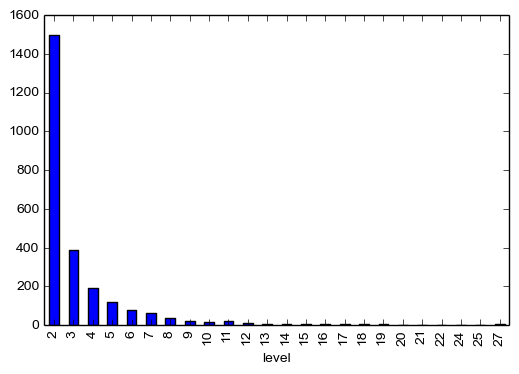

In [13]:
f[iquit].groupby('level').size().plot.bar();
# A lot of people quit at level 1, and I don't know why. Like a loooot.